In [348]:
import pandas as pd

In [349]:
data = pd.ExcelFile('slova.xls')
data = data.parse(header=None)
data['Slova'] = data[0]
data.drop(columns=[0], inplace=True)

In [350]:
data

,Slova
0,1 (0.5) BabA
1,2 (0.5) BaBabAbA
2,3 (0.5) BaBaBabAbAbA
3,4 (0.5) BaBAbaBabAbaBAbA
4,5 (0.5) BaBAbAbaBabAbaBaBAbA
...,...
2073,61 BABABAbabababababABABABABABABabababababaBABABA
2074,62 BABABAbabababababABABABABABAbabababababaBABABABABABabababababaBABABA
2075,63 BABABABababababababababABABABA
2076,64 BABABABABABAbababababababababababababaBABABABABABA


In [351]:
data['Slova'] = data['Slova'].astype(str)

In [352]:
def concat_row(row):
    if row[0].isdigit():
        return row
    elif row.startswith('I'):
        #print(row)
        return row[9:]
    else:
        return row
        
    
data['Slova'] = data['Slova'].apply(concat_row)

In [353]:
pd.set_option('display.max_colwidth', None)

In [354]:
data.iloc[77]

Slova    BabA
Name: 77, dtype: object

In [355]:
data.iloc[75]

Slova    BaBA
Name: 75, dtype: object

In [356]:
index_list = []
for index, row in data.iterrows():
    if data.loc[index][0][0].isdigit():
        pass
    else:
        data.loc[index-1] = data.loc[index-1] + data.loc[index]
        index_list.append(index)

        
#print(index_list)
data.drop(data.index[index_list], inplace=True)
data.reset_index(inplace=True)

In [357]:
"""index_list = []
thirdRow = False

for index, row in data.iterrows():
    try:
        if data.loc[index][0][0].isdigit():
            pass
        else:
            index_list.append(index)
            #print(data.loc[index-1])
            
    except:
        pass
        

        """
#print(index_list)
#data.drop(data.index[index_list], inplace=True)
#data.reset_index(inplace=True)

'index_list = []\nthirdRow = False\n\nfor index, row in data.iterrows():\n    try:\n        if data.loc[index][0][0].isdigit():\n            pass\n        else:\n            index_list.append(index)\n            #print(data.loc[index-1])\n            \n    except:\n        pass\n        \n\n        '

In [358]:
print(data.iloc[82])
print(data.iloc[83])
print(data.iloc[84])

index                                                                                                                                       89
Slova    83 (0.5)     BabABabABabABabaBAbaBAbaBAbaBAbaBAbaBAbaBAbaBABabABabABabABabABabABabABabABAbaBAbaBAbaBAbaBAbaBAbaBAbaBAbabABabABabABabA
Name: 82, dtype: object
index                                                                                                                                           91
Slova    84 (0.5)     BabAbaBAbaBAbABabABaBAbaBAbABabABabAbaBAbaBabABabAbaBAbaBAbABabABaBAbaBAbaBabABabAbaBAbaBabABabABaBAbaBAbABabABaBAbaBAbaBabA
Name: 83, dtype: object
index                                                                                                                                           93
Slova    85 (0.5)     BabABabABAbaBAbaBAbaBAbabABabABabABabABAbaBAbaBAbaBAbabABabABabABabABabaBAbaBAbaBAbaBABabABabABabABabaBAbaBAbaBAbaBABabABabA
Name: 84, dtype: object


In [359]:
data

,index,Slova
0,0,1 (0.5) BabA
1,1,2 (0.5) BaBabAbA
2,2,3 (0.5) BaBaBabAbAbA
3,3,4 (0.5) BaBAbaBabAbaBAbA
4,4,5 (0.5) BaBAbAbaBabAbaBaBAbA
...,...,...
1381,2073,61 BABABAbabababababABABABABABABabababababaBABABA
1382,2074,62 BABABAbabababababABABABABABAbabababababaBABABABABABabababababaBABABA
1383,2075,63 BABABABababababababababABABABA
1384,2076,64 BABABABABABAbababababababababababababaBABABABABABA


In [360]:
data.iloc[76]

index                                                                                                                               78
Slova    77 (0.5)     BabABaBAbaBAbaBabABabABaBAbaBAbaBabABabABaBAbaBAbaBabABabABabAbaBAbaBAbABabABabAbaBAbaBAbABabABabAbaBAbaBAbABabA
Name: 76, dtype: object

In [361]:
import re
def split_row_class(row):
    delimiters = '(0.5)', '(0.75)', '(2)', '(4)', '(5)', '(8)', '(9)', '(10)', ' '
    regexPattern = '|'.join(map(re.escape, delimiters))
    try:
        row = row.replace(" ","")
        row = re.split(regexPattern, row)
        return row[0].replace(" ", "")
    except:
        
        return row[0]

    
data['Class_index'] = data['Slova'].apply(split_row_class)

In [362]:
data

,index,Slova,Class_index
0,0,1 (0.5) BabA,1
1,1,2 (0.5) BaBabAbA,2
2,2,3 (0.5) BaBaBabAbAbA,3
3,3,4 (0.5) BaBAbaBabAbaBAbA,4
4,4,5 (0.5) BaBAbAbaBabAbaBaBAbA,5
...,...,...,...
1381,2073,61 BABABAbabababababABABABABABABabababababaBABABA,61BABABAbabababababABABABABABABabababababaBABABA
1382,2074,62 BABABAbabababababABABABABABAbabababababaBABABABABABabababababaBABABA,62BABABAbabababababABABABABABAbabababababaBABABABABABabababababaBABABA
1383,2075,63 BABABABababababababababABABABA,63BABABABababababababababABABABA
1384,2076,64 BABABABABABAbababababababababababababaBABABABABABA,64BABABABABABAbababababababababababababaBABABABABABA


In [363]:

def split_row(row):
    delimiters = '(0.5)', '(0.75)', '(2)', '(4)', '(5)', '(8)', '(9)', '(10)'
    regexPattern = '|'.join(map(re.escape, delimiters))
    try:
        row = re.split(regexPattern, row)
        return row[1].replace(" ", "")
    except:
        return row[0][2:].replace(" ","")
    
data['Slova'] = data['Slova'].apply(split_row)
    

In [364]:
data

,index,Slova,Class_index
0,0,BabA,1
1,1,BaBabAbA,2
2,2,BaBaBabAbAbA,3
3,3,BaBAbaBabAbaBAbA,4
4,4,BaBAbAbaBabAbaBaBAbA,5
...,...,...,...
1381,2073,BABABAbabababababABABABABABABabababababaBABABA,61BABABAbabababababABABABABABABabababababaBABABA
1382,2074,BABABAbabababababABABABABABAbabababababaBABABABABABabababababaBABABA,62BABABAbabababababABABABABABAbabababababaBABABABABABabababababaBABABA
1383,2075,BABABABababababababababABABABA,63BABABABababababababababABABABA
1384,2076,BABABABABABAbababababababababababababaBABABABABABA,64BABABABABABAbababababababababababababaBABABABABABA


In [365]:
data.drop(columns='index', inplace=True)

In [373]:
#data.to_csv('lettersCleaned.csv')

## T promenljiva

In [367]:
dt = pd.ExcelFile('T_promenljiva.xlsx')
dt = dt.parse(names=['Index','Class','v1','v2', 'T', 'T*', 'Lf', 'Stability','u1','u2','mi'], header=None)


In [368]:
dt.reset_index(inplace=True)
dt.drop(columns=['index','u1', 'u2'], inplace=True)
dt.drop(dt[dt['Class']=='Class and number'].index, inplace=True)

In [369]:
dt

,Index,Class,v1,v2,T,T*,Lf,Stability,mi
0,1.0,-0.5,0.286924,0.079185,4.176129,4.538,4,U,0.315879
1,2.0,-0.5,0.342031,0.180937,13.915334,9.063,8,U,1.97222
2,3.0,-0.5,0.369772,0.191007,25.944195,13.095,12,U,2.314004
3,4.0,-0.5,0.200966,0.243108,19.013416,19.086,16,U,6.927685
4,5.0,-0.5,0.261324,0.235624,28.435858,23.513,20,U,1.109487
...,...,...,...,...,...,...,...,...,...
1357,1.0,-10,0.956588,0.849097,24.256801,1935.907,64,U,3.577508
1358,1.0,-10,0.998615,0.593517,47.936051,3932.658,130,U,2.119012
1359,1.0,-10,0.963922,0.974436,48.13162,3751.177,124,U,7.666035
1360,2.0,-10,0.925484,0.95173,49.868521,3931.244,130,U,1.824135


In [370]:
#dt.to_csv('numbersCleaned.csv')

In [20]:
import pandas as pd
data_3 = pd.ExcelFile('33newSolutionsCombined.xlsx')
data_3 = data_3.parse()
#data_3.drop(columns=[0], inplace=True)

In [21]:
data_3.columns

Index(['N', 'vx', 'vy', 'T', 'T∗', 'Lf'], dtype='object')

In [24]:
data_3.rename(columns={'N':'N', 'vx':'v1', 'vy':'v2', 'T':'T', 'T∗':'T*','Lf':'Lf'}, inplace=True)

In [25]:
data_3

,N,v1,v2,T,T*,Lf
0,1,0.700195,0.407172,45.872198,17.790450,8
1,2,0.055589,0.476380,9.870600,24.034312,12
2,3,0.083258,0.459741,12.142233,30.432315,14
3,4,0.524681,0.558089,48.104414,30.605651,14
4,5,0.164159,0.723757,42.370889,33.068766,14
5,6,0.043166,0.502319,18.394089,42.125143,18
6,7,0.049573,0.372930,14.879464,44.487651,18
7,8,0.024077,0.465767,18.713458,46.990650,22
8,9,0.101056,0.488325,24.841373,57.704825,26
9,10,0.273267,0.454149,29.697795,63.357123,26


In [26]:
data_3.to_csv('33new.csv', index=False)

<AxesSubplot:xlabel='T*', ylabel='Lf'>

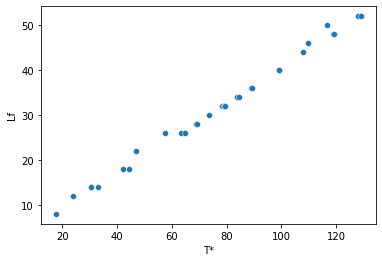

In [27]:
import seaborn as sns
sns.scatterplot(x = 'T*', y = 'Lf', data = data_3)
#plt.title('T* u zavisnosti od dužine reči raspoređeno po klasama')

<AxesSubplot:xlabel='v1', ylabel='v2'>

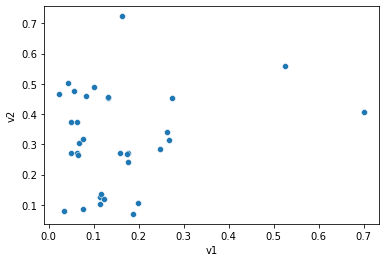

In [28]:
sns.scatterplot(x = 'v1', y = 'v2', data = data_3)